(a)

In [3]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy import spatial
import matplotlib.pyplot as plt
from astropy.table import Table
import emcee
import corner
import pdb

In [4]:
# read in the photometry data
t = Table.read('data/NGC6341R.RDVIQ.cal.adj.zpt', format='ascii.commented_header')
t

id,x,y,Vvega,Verr,VIvega,VIerr,Ivega,Ierr,Vground,Iground,Nv,Ni,wV,wI,xsig,ysig,othv,othi,qfitV,qfitI,RA,Dec
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
1,2271.601,972.748,20.693,0.007,0.588,0.0104,20.105,0.0077,20.847,20.063,1,1,1,1,0.005,0.003,0.0,0.0,0.043,0.05,259.2942832,43.1081225
2,2277.373,986.964,19.652,0.0043,0.483,0.0066,19.169,0.005,19.764,19.126,1,1,1,1,0.005,0.006,0.0,0.0,0.053,0.042,259.2941735,43.1083199
3,2302.852,958.145,24.067,0.0339,0.97,0.0463,23.097,0.0314,24.353,23.064,1,1,1,1,0.02,0.026,0.0,0.0,0.176,0.136,259.2936887,43.1079197
4,2291.615,971.693,21.71,0.0112,0.773,0.016,20.937,0.0114,21.932,20.899,1,1,1,1,0.014,0.011,0.0,0.0,0.046,0.057,259.2939026,43.1081079
5,2312.609,969.743,23.712,0.0287,0.992,0.0389,22.72,0.0263,24.004,22.688,1,1,1,1,0.044,0.049,0.0,0.0,0.101,0.118,259.293503,43.1080808
6,2322.957,941.276,22.158,0.0138,0.84,0.0194,21.318,0.0136,22.402,21.281,1,1,1,1,0.013,0.007,0.0,0.0,0.058,0.066,259.2933061,43.1076855
7,2327.27,987.213,22.113,0.0135,0.833,0.019,21.28,0.0134,22.356,21.243,1,1,1,1,0.021,0.018,0.0,0.0,0.068,0.057,259.2932242,43.1083235
8,2343.49,954.235,18.772,0.0029,0.417,0.0045,18.355,0.0034,18.857,18.311,1,1,1,1,0.013,0.002,0.0,0.0,0.026,0.029,259.2929155,43.1078655
9,2352.309,960.781,20.899,0.0077,0.724,0.0111,20.175,0.008,21.103,20.136,1,1,1,1,0.044,0.019,0.011,0.007,0.032,0.081,259.2927478,43.1079564


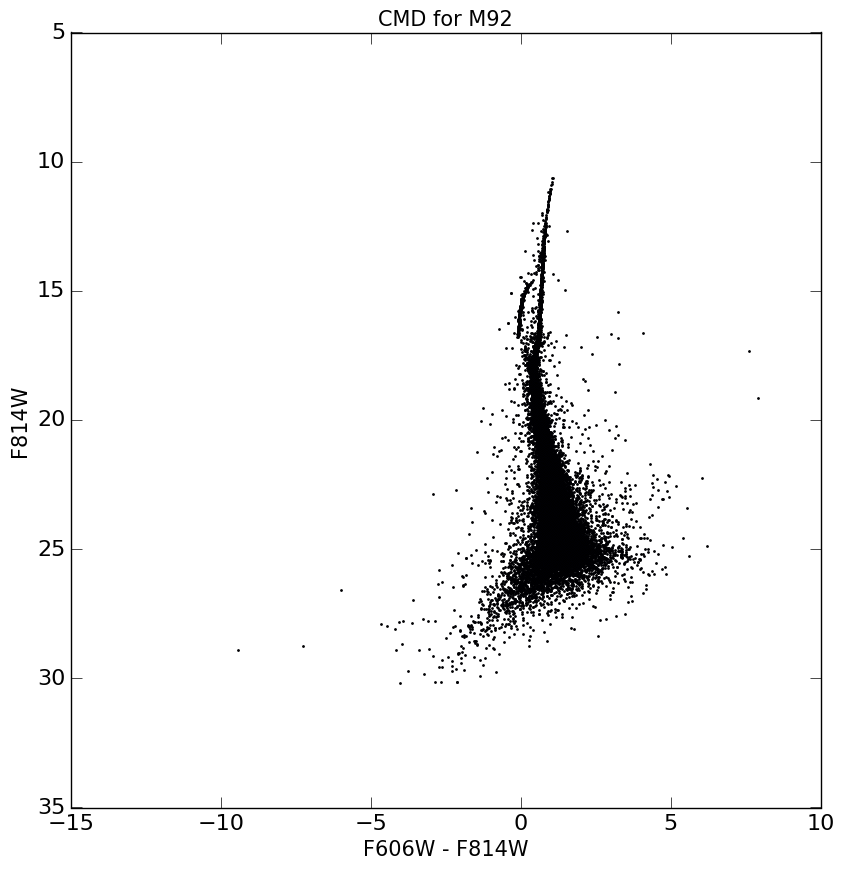

In [5]:
# plot the CMD
# remove the bad point with Vvega larger than 90
idx_good = np.where(t['Verr']<10)[0]
t_good = t[idx_good]
R = t_good['Vvega']
RI = t_good['VIvega']
RI_error = t_good['VIerr']
I = t_good['Ivega']
I_error = t_good['Ierr']

# plot the CMD
plt.figure(figsize=(10,10))
plt.clf()
plt.scatter(RI, I, edgecolor=None, s=1)
plt.xlabel('F606W - F814W')
plt.ylabel('F814W')
plt.gca().invert_yaxis()
plt.title('CMD for M92')



(b)

From Ned, I found the median distance modulus is 14.9 mag.

The forground galactic extinction is 0.048 for R, 0.034 for I.

Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd


/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.50_afe

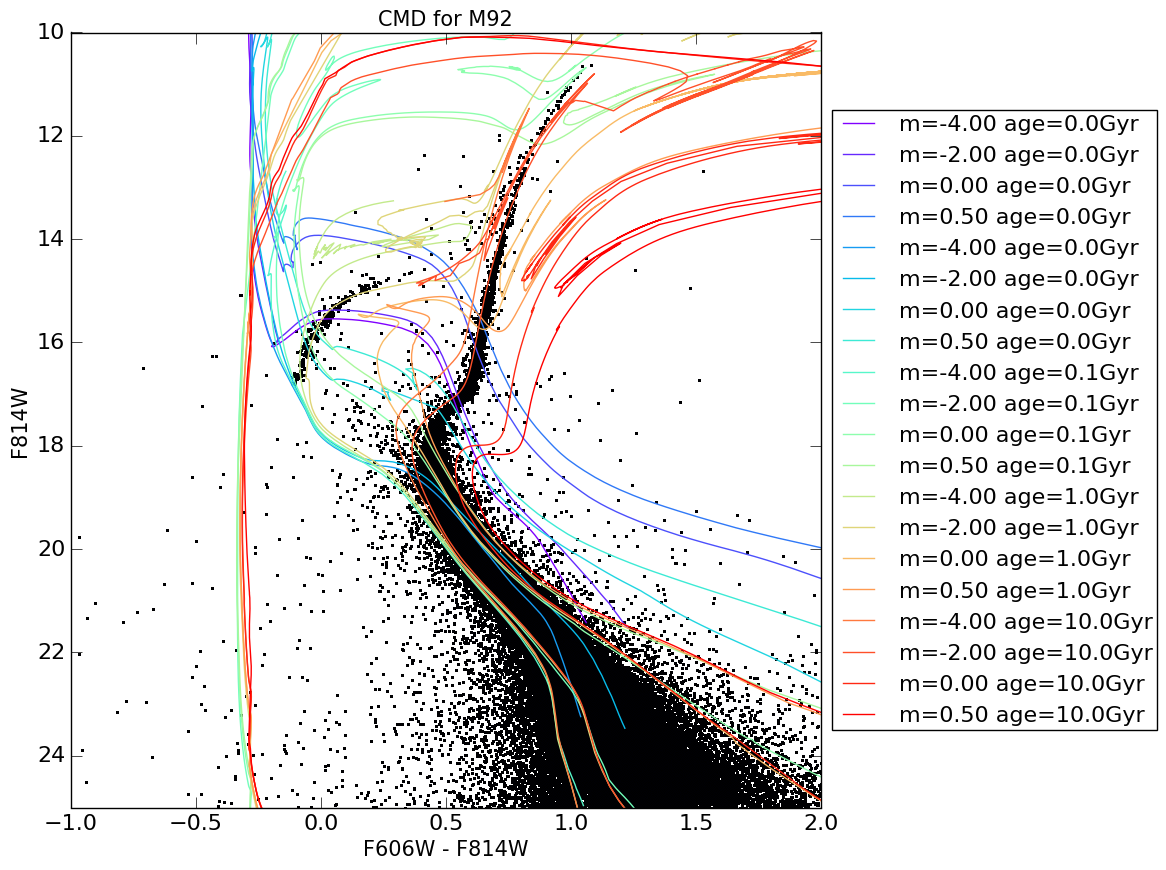

In [14]:
import read_mist_models
import matplotlib.cm as cm

def fit_iso(age, m, AR = 0.048, AI=0.034, D=14.9, color=None):
    if m < 0:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %np.abs(m))
    else:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %m)
    age_ind = isocmd.age_index(age)
    R_model = isocmd.isocmds[age_ind]['ACS_WFC_F606W']
    I_model = isocmd.isocmds[age_ind]['ACS_WFC_F814W']

    # consider distance modulus and reddening
    R_model += D + AR
    I_model += D + AI

    plt.scatter(RI, I, edgecolor=None, s=1, label=None)
    if color != None:
        plt.plot(R_model-I_model, I_model, label='m=%4.2f age=%.1fGyr' %(m, 10**age/1e9), color=color)
    else:
        plt.plot(R_model-I_model, I_model, label='m=%4.2f age=%.1fGyr' %(m, 10**age/1e9))
    plt.xlabel('F606W - F814W')
    plt.ylabel('F814W')
    plt.ylim(10,25)
    plt.xlim(-1,2)
    plt.gca().invert_yaxis()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('CMD for M92')
    return

# first try a wide range of ages and metallicity
AGE = [6,7,8,9,10]
M = [-4, -2, 0, 0.5]
colors = cm.rainbow(np.linspace(0, 1, len(AGE)*len(M)))
plt.figure(figsize=(10,10))
plt.clf()
i=0
for age in AGE:
    for m in M:
        fit_iso(age, m, color=colors[i])
        i += 1




narrow down the log(age) to 9.5 - 10.3 


Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd


/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p0.00_afe

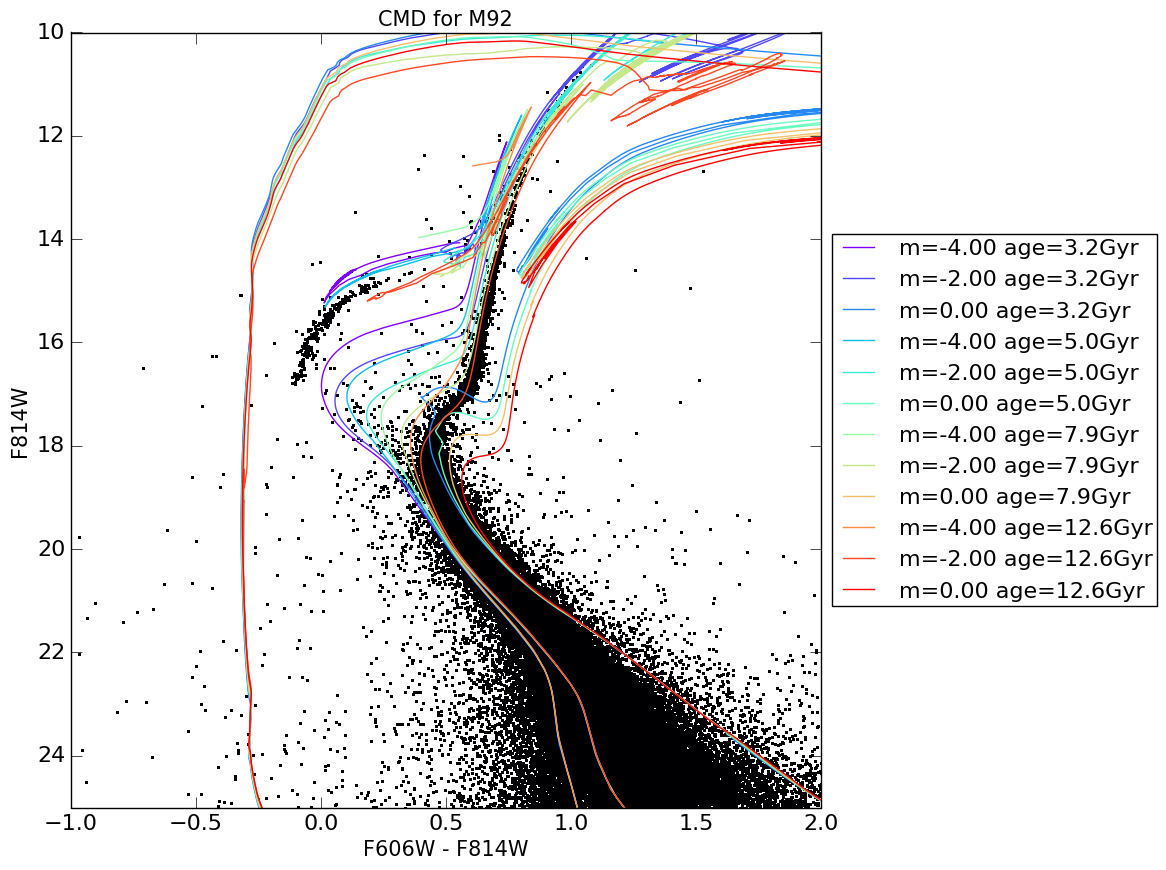

In [16]:
AGE = np.arange(9.5, 10.2, 0.2)
M = [-4, -2, 0]
colors = cm.rainbow(np.linspace(0, 1, len(AGE)*len(M)))
plt.figure(figsize=(10,10))
plt.clf()
i=0
for age in AGE:
    for m in M:
        fit_iso(age, m, color=colors[i])
        i += 1

Based on those plots, I think age is around 9.8-10.3 Gyr, metallicity is aorund -2.


For stars in MSTO and RGB, find the most probable mass in the isochrone which maximize the gaussian probability in combined color and magnitude. Because some stars have extremely small errors (down to 0 or 0.0004), they will dominate the probability and they are very likely underpredicted, so I decide to give all stars same error 1.

**************first try******************

Using emcee to find the best fit.
On a certain set of (age, metallicity), I make AR, AI, D as free parameter in mcmc.
I tried three different methods to calculate probability: "1.for" loop 2. matrix  3. Kdtree, but none of these methods are fast enough to run mcmc efficiently. 

In [8]:
def ln_prior(theta):
    """
    free parameters:
    AR: Gaussian(0.048, 0.1)
    AI: Gaussian(0.034, 0.1)
    D: Gaussian(14.9, 1)"""
    AR, AI, D = theta
    AR_mean = 0.048
    AR_error = 0.1
    ln_AR = -np.log(AR_error) - (AR-AR_mean)**2/(2*AR_error**2)
    AI_mean = 0.034
    AI_error = 0.1
    ln_AI = -np.log(AI_error) - (AI-AI_mean)**2/(2*AI_error**2)
    D_mean = 14.9
    D_error = 1
    ln_D = -np.log(D_error) - (D-D_mean)**2/(2*D_error**2)
    return (ln_AR + ln_AI + ln_D)
        
def ln_likelihood(theta, RI, I, RIe, Ie, R_model, I_model):
    AR, AI, D = theta
    R_model += D + AR
    I_model += D + AI
    RI_model = R_model - I_model
    
    # 1st method to calculate chi2
    #P_s = np.zeros(len(RI))
    #for i in range(len(RI)):
    #    RIs = RI[i]
    #    Is = I[i]
    #    RIes = RIe[i]
    #    Ies = Ie[i]
    #    Prob_s =  - np.log(RIes) - (RIs-RI_model)**2/(2*RIes**2) - \
    #              - np.log(Ies) - (Is-I_model)**2/(2*Ies**2)
    #    P_s[i] = np.max(Prob_s)
    
    # 2nd method to calculate chi2
    #RI2, RI_model2 = np.meshgrid(RI, RI_model)
    #I2, I_model2 = np.meshgrid(I, I_model)
    #P_s = np.max(-(RI2 - RI_model2)**2 - (I2 - I_model2)**2, axis=0)
    
    # 3rd method: using kdTree
    model = np.array([RI_model, I_model]).T
    tree = spatial.KDTree(list(model))
    points = np.array([RI, I]).T
    d, idx = tree.query(points)
    P_s = - np.log(RIe) - (RI-model[idx].T[0])**2/(2*RIe**2) - \
                 - np.log(Ie) - (I-model[idx].T[1])**2/(2*Ie**2)
    return np.sum(P_s)

def ln_posterior(theta, RI, I, RIe, Ie, R_model, I_model):
    return ln_prior(theta) + ln_likelihood(theta, RI, I, RIe, Ie, R_model, I_model)


In [9]:
# only use stars in MSTO and RGB
idx = np.where((RI>0.25) & (RI<1) & (I<19) & (I>12))[0]

# find those points with 0 uncertainty
RI_error[np.where(RI_error==0)[0]] = 0.1
I_error[np.where(I_error==0)[0]] = 0.1

RI_cut = np.array(RI[idx])
I_cut = np.array(I[idx])
RIe_cut = np.array(RI_error[idx])
Ie_cut = np.array(I_error[idx])

# make all the uncertainty to be 1.
RIe_cut[:]=1
Ie_cut[:]=1


In [10]:
def find_Ext_Dis(age, m):
    # raed in isochrone
    if m < 0:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %np.abs(m))
    else:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %m)
    age_ind = isocmd.age_index(age)
    isocmd_age = isocmd.isocmds[age_ind]
    R_model = isocmd_age['ACS_WFC_F606W']
    I_model = isocmd_age['ACS_WFC_F814W']
    # run emcee
    steps = 100
    nwalkers = 10
    ndim = 3
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=[RI_cut, I_cut, RIe_cut, Ie_cut, R_model, I_model])
    theta0 = [0.048, 0.034, 14.9]
    pos = [np.random.normal((theta0), (0.005, 0.005, 0.1)) for i in range(nwalkers)]
    sampler.run_mcmc(pos, steps)
    #theta = sampler.chain.reshape((-1, ndim))
    return sampler

In [ ]:
sampler = find_Ext_Dis(10,-0.25)

***********second try*************

I found for each pair of m and age, this whole process takes about 8 seconds, so it takes 8*100*10= 11h to run 100 steps, 10 walkers mcmc. So I decide to go to the old fashion way with the fixed D, AR, AI and find the most probable fit.

Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m1.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd


/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m3.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m3.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m4.00_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd
best fit age=14.13 Gyr, metallicity=-2.50
Reading in: data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m2.50_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd


/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


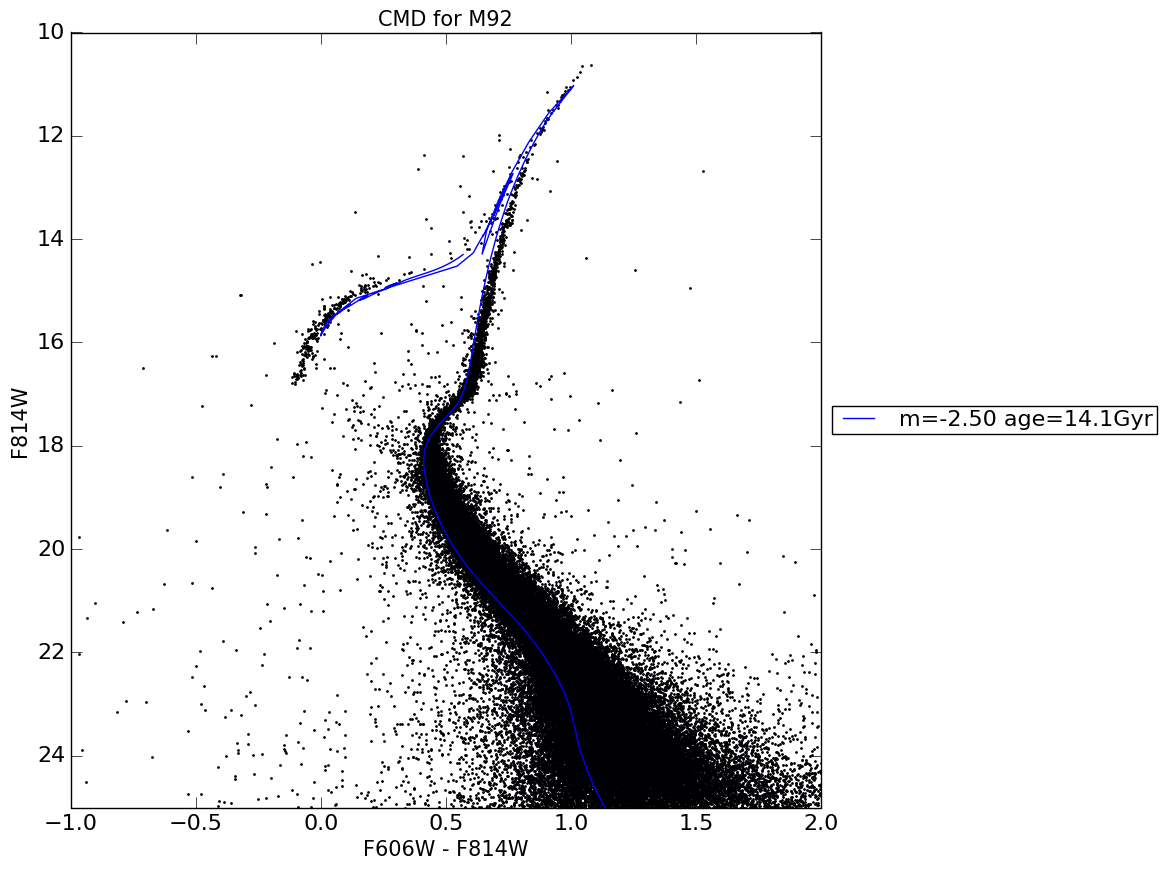

In [17]:
# only use stars in MSTO and RGB
idx = np.where((RI>0.25) & (RI<1) & (I<18.5) & (I>12))[0]
RI_cut = np.array(RI[idx])
I_cut = np.array(I[idx])
RIe_cut = np.array(RI_error[idx])
Ie_cut = np.array(I_error[idx])
# make all the uncertainty to be 1.
RIe_cut[:]=1
Ie_cut[:]=1

# for each set of age and metallicity, run mcmc and find the maximum P.
AR = 0.048
AI = 0.034
D = 14.9
theta = [AR, AI, D]

M = np.array([-1.5, -2, -2.5, -3, -3.5, -4])
AGE = np.arange(9.5, 10.2, 0.05)


p = np.zeros((len(M), len(AGE)))
for i in range(len(M)):
    m = M[i]
    if m < 0:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_m%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %np.abs(m))
    else:
        isocmd = read_mist_models.ISOCMD('data/MIST_v1.0_HST_ACSWF/MIST_v1.0_feh_p%4.2f_afe_p0.0_vvcrit0.4_HST_ACSWF.iso.cmd' %m)
    for j in range(len(AGE)):
        age = AGE[j]
        age_ind = isocmd.age_index(age)
        isocmd_age = isocmd.isocmds[age_ind]
        R_model = isocmd_age['ACS_WFC_F606W']
        I_model = isocmd_age['ACS_WFC_F814W']
        p[i,j] = ln_likelihood(theta, RI_cut, I_cut, RIe_cut, Ie_cut, R_model, I_model)
#np.log(RIe_cut)

idx_m, idx_age = np.unravel_index(p.argmax(), p.shape)
print('best fit age=%.2f Gyr, metallicity=%.2f' %(10**AGE[idx_age]/1e9, M[idx_m]))
plt.figure(figsize=(10,10))
plt.clf()
fit_iso(AGE[idx_age], M[idx_m])


(c)

In [20]:
import read_parsec_models
def fit_iso_parsec(age, z, AR = 0.048, AI=0.034, D=14.9, color=None):
    isocmd = read_parsec_models.ISOCMD('data/PARSEC/%.4fz.dat' %z)
    age_ind = isocmd.age_index(age)
    R_model = isocmd.isocmds[age_ind]['F606W']
    I_model = isocmd.isocmds[age_ind]['F814W']

    # consider distance modulus and reddening
    R_model += D + AR
    I_model += D + AI

    plt.scatter(RI, I, edgecolor=None, s=1, label=None)
    if color != None:
        plt.plot(R_model-I_model, I_model, label='z=%6.4f age=%.2fGyr' %(z, 10**age/1e9), color=color)
    else:
        plt.plot(R_model-I_model, I_model, label='z=%6.4f age=%.2fGyr' %(z, 10**age/1e9))
    plt.xlabel('F606W - F814W')
    plt.ylabel('F814W')
    plt.ylim(10,25)
    plt.xlim(-1,2)
    plt.gca().invert_yaxis()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('CMD for M92')
    return

Reading in: data/PARSEC/0.0010z.dat


/Users/siyao/Applications/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Reading in: data/PARSEC/0.0020z.dat
Reading in: data/PARSEC/0.0030z.dat
Reading in: data/PARSEC/0.0040z.dat
Reading in: data/PARSEC/0.0050z.dat
Reading in: data/PARSEC/0.0010z.dat
Reading in: data/PARSEC/0.0020z.dat
Reading in: data/PARSEC/0.0030z.dat
Reading in: data/PARSEC/0.0040z.dat
Reading in: data/PARSEC/0.0050z.dat
Reading in: data/PARSEC/0.0010z.dat
Reading in: data/PARSEC/0.0020z.dat
Reading in: data/PARSEC/0.0030z.dat
Reading in: data/PARSEC/0.0040z.dat
Reading in: data/PARSEC/0.0050z.dat
Reading in: data/PARSEC/0.0010z.dat
Reading in: data/PARSEC/0.0020z.dat
Reading in: data/PARSEC/0.0030z.dat
Reading in: data/PARSEC/0.0040z.dat
Reading in: data/PARSEC/0.0050z.dat
Reading in: data/PARSEC/0.0010z.dat
Reading in: data/PARSEC/0.0020z.dat
Reading in: data/PARSEC/0.0030z.dat
Reading in: data/PARSEC/0.0040z.dat
Reading in: data/PARSEC/0.0050z.dat
Reading in: data/PARSEC/0.0010z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0020z.da

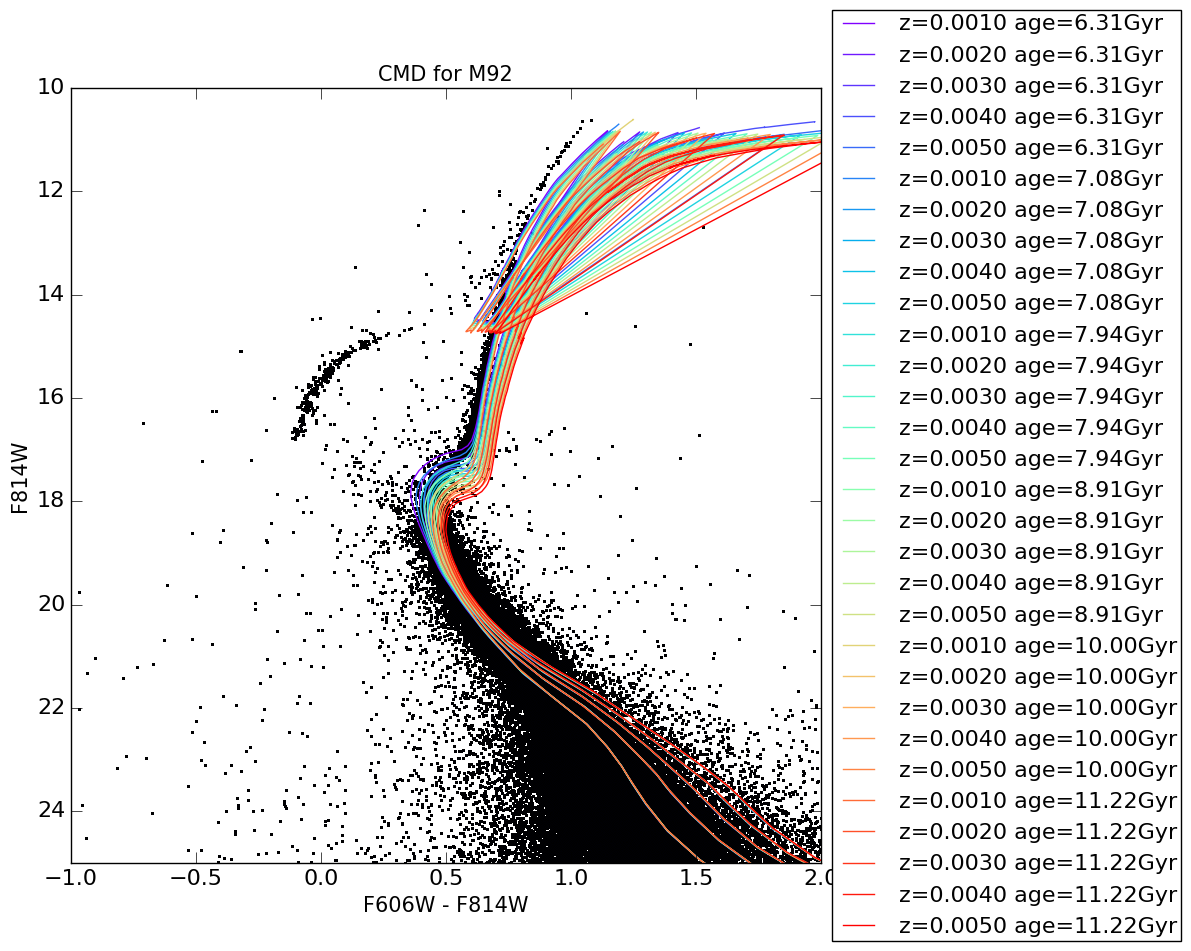

In [21]:
AGE = np.arange(9.8, 10.1, 0.05)
Z = [0.001, 0.002, 0.003, 0.004, 0.005]
colors = cm.rainbow(np.linspace(0, 1, len(AGE)*len(Z)))
plt.figure(figsize=(10,10))
plt.clf()
i=0
for age in AGE:
    for z in Z:
        fit_iso_parsec(age, z, color=colors[i])
        i += 1

In [24]:
Z[idx_z]

0.00030000000000000003

Reading in: data/PARSEC/0.0001z.dat
Reading in: data/PARSEC/0.0002z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0003z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0004z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0005z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0006z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0007z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0008z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0009z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0010z.dat
The requested age is outside the range. Try between 9.5 and 10.05
Reading in: data/PARSEC/0.0011z.dat
The reques

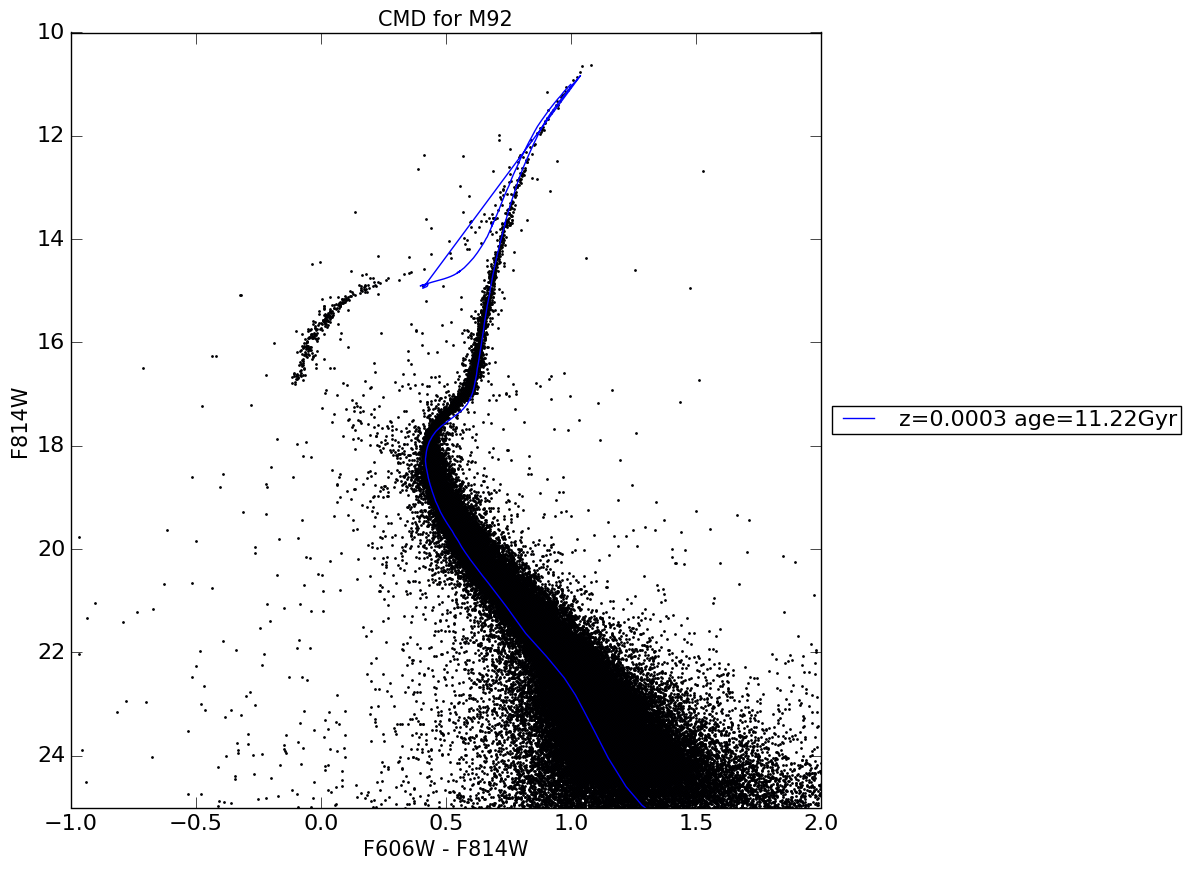

In [22]:
Z = np.arange(0.0001, 0.002, 0.0001)
AGE = np.arange(9.8, 10.1, 0.05)

p = np.zeros((len(Z), len(AGE)))
for i in range(len(Z)):
    z = Z[i]
    isocmd = read_parsec_models.ISOCMD('data/PARSEC/%.4fz.dat' %z)
    for j in range(len(AGE)):
        age = AGE[j]
        age_ind = isocmd.age_index(age)
        R_model = isocmd.isocmds[age_ind]['F606W']
        I_model = isocmd.isocmds[age_ind]['F814W']
        p[i,j] = ln_likelihood(theta, RI_cut, I_cut, RIe_cut, Ie_cut, R_model, I_model)
#np.log(RIe_cut)

idx_z, idx_age = np.unravel_index(p.argmax(), p.shape)
plt.figure(figsize=(10,10))
plt.clf()
fit_iso_parsec(AGE[idx_age], Z[idx_z])



(d)

Although I only use MSTO and RGB to fit isochrone, MIST does a good job on HB too. Although PARSEC doesn't fit HB well, it fits MSTO and RGB better than MIST. 

According to Forbes et al. 2010 and Paust et al. 2007, the meallicity and age are [Fe/H]=-2.16 and age = 14.2 +/- 1.2 Gyr. MIST gives [Fe/H]=-2.5 and age = 14.1 Gyr. PARSEC gives [M/H]=-1.7 and age = 11.22 Gyr. Overall, MIST gives better prediction compared with literature.